In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For better visuals
sns.set(style="whitegrid")

In [7]:
df = pd.read_csv('loan.csv', low_memory=False)
df.shape
df.head()
#remove id membebr id,

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(columns=['id', 'member_id', 'url', 'desc', 'title'], errors='ignore')

In [9]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.loc[:, df.isnull().mean() < 0.5]

In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [13]:
selected_cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 
                 'home_ownership', 'annual_inc', 'loan_status', 'purpose', 
                 'dti', 'addr_state']

In [14]:
df=df[selected_cols]

In [15]:
df=df[df['loan_status'].isin(['Fully Paid','Charged Off','Default'])]

In [16]:
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)


In [17]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,addr_state,default
100,30000,36 months,22.35,D,5 years,MORTGAGE,100000.0,Fully Paid,debt_consolidation,30.46,CA,0
152,40000,60 months,16.14,C,< 1 year,MORTGAGE,45000.0,Fully Paid,credit_card,50.53,OH,0
170,20000,36 months,7.56,A,10+ years,MORTGAGE,100000.0,Fully Paid,credit_card,18.92,WA,0
186,4500,36 months,11.31,B,10+ years,RENT,38500.0,Fully Paid,credit_card,4.64,TX,0
215,8425,36 months,27.27,E,3 years,MORTGAGE,450000.0,Fully Paid,credit_card,12.37,MA,0


In [21]:
df['default']

100        0
152        0
170        0
186        0
215        0
          ..
2260654    1
2260655    1
2260656    0
2260658    0
2260664    0
Name: default, Length: 1303638, dtype: int64

In [22]:
grade_df = df.groupby('grade')['default'].mean().sort_values(ascending=False)

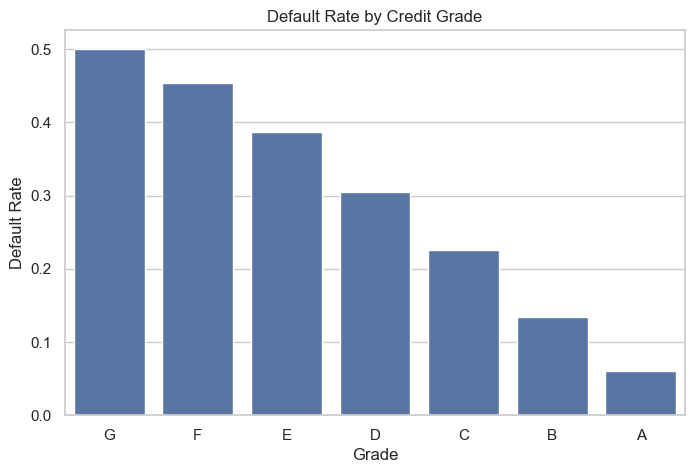

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x=grade_df.index, y=grade_df.values)
plt.title('Default Rate by Credit Grade')
plt.ylabel('Default Rate')
plt.xlabel('Grade')
plt.show()

In [24]:
#default rate by loan purpose

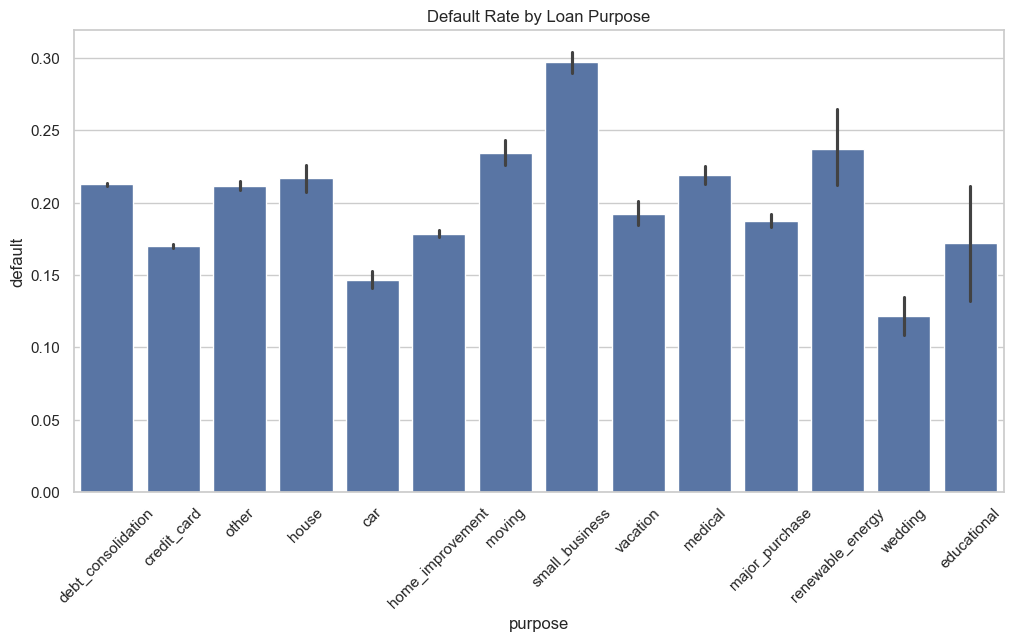

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='purpose', y='default', data=df)
plt.xticks(rotation=45)
plt.title('Default Rate by Loan Purpose')
plt.show()

In [27]:
default_rate=df['default'].mean()*100

In [28]:
print(default_rate)

20.073517341470563


In [35]:
default_purpose=df.groupby('purpose')['default'].mean()*100

In [36]:
max_default_purpose=default_purpose.idxmax()

In [38]:
print(max_default_purpose)

small_business


In [39]:
#it can be seeen the maximum no of default is committed by small businesses

In [49]:
df['int_rate'].head()  # Look at the first few rows to check the format
# df['int_rate'].isnull().sum()  # Check for NaN values


100    11.12
152    11.12
170    11.12
186    11.12
215    11.12
Name: int_rate, dtype: float64

In [57]:
# Example: Specify dtype for 'int_rate' column as string initially
df = pd.read_csv('Loan.csv', dtype={'int_rate': str})




/var/folders/vg/72yxylyd4gq0v890ntk8kqfh0000gn/T/ipykernel_14192/3774775541.py:2: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Loan.csv', dtype={'int_rate': str})


In [58]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df = df.drop(columns=['id', 'member_id', 'url', 'desc', 'title'], errors='ignore')

In [60]:
selected_cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 
                 'home_ownership', 'annual_inc', 'loan_status', 'purpose', 
                 'dti', 'addr_state']

In [68]:
df=df[selected_cols]
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

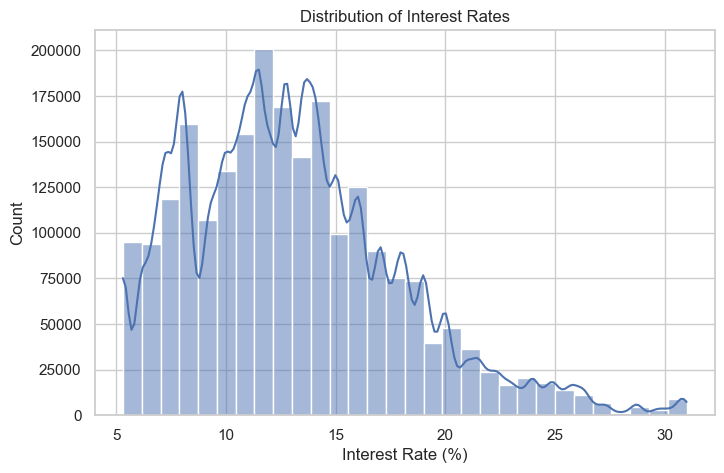

In [63]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(df['int_rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.show()

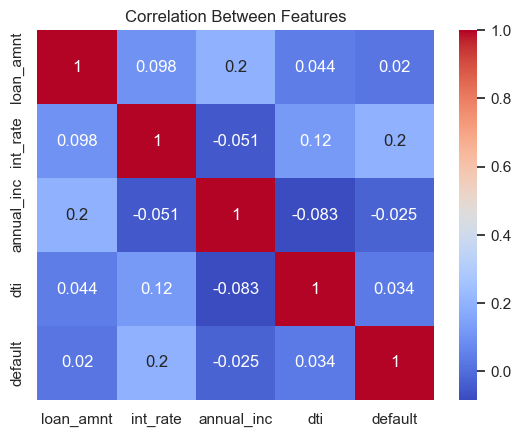

In [69]:
numeric_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti','default']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

In [70]:
#from our analysis
# it is clear that garde f loans have a much higher default rate than grade a loans
# Loans issued by startups and small businesses have high default rates
# borrowers with high interest rate tend to default more frequently

In [71]:
df.to_csv('cleaned_loan_data.csv', index=False)